In [6]:
import torch.nn as nn
import numpy as np
import gym
from seagul.rl.ars.meta_ars import MetaARSAgent
import matplotlib.pyplot as plt
import torch
import dill
import seagul.envs
import pybullet_envs
import pickle
from scipy.signal import find_peaks
from collections import namedtuple
import math


from common import *

%load_ext autoreload
%autoreload 2

from IPython.display import Audio
# sound_file = '/home/sgillen/Downloads/chime.wav'
# Audio(filename=sound_file, autoplay=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


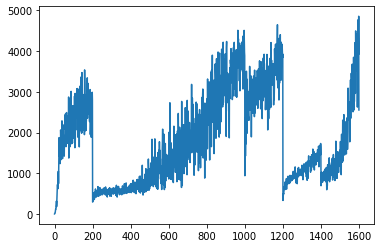

In [18]:
agent_list = pickle.load(open("agents/meta_hmap_ehurdle_45", "rb"))
#agent0 = meta_agent.agents[7]
#meta_agent = pickle.load(open("agents/meta_hurdl", "rb"))
agent0 = agent_list[0]
#agent0 = meta_agent.agents[0]
plt.plot(agent0.lr_hist)

[ 1.25092941e+00  8.33622634e-04  4.59421817e-03  3.13685793e-03
 -3.96984868e-03  3.28439002e-03 -4.65121442e-03  4.18354926e-03
 -2.58638919e-03 -9.06359718e-04 -2.67619869e-03  0.00000000e+00]
Creating window glfw
[5329.84937373]


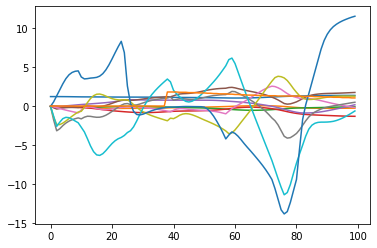

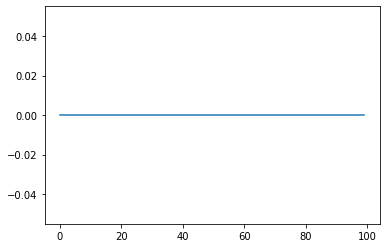

In [21]:
env_name = "hurdle_hopper-v0"
env = gym.make(env_name, gap_set = [45], hurdle_height=.520)

print(env.reset())
seed = 2
#env = gym.make("Hopper-v2") 

#agent = meta_agent.agents[seed]
obs, act, rew, dones = do_rollout(env, agent_list[0].model, render=True, ep_length=2000, return_on_done=True)
print(sum(rew))
plt.plot(obs[:100,:]);
plt.figure()
plt.plot(dones[:100])

In [ ]:
# agent0.env_config={"slope_set":[0], 'random':False}
# agent0.postprocessor = mdim_div
# agent0.learn(100);
# Audio(filename=sound_file, autoplay=True)

In [ ]:
# import copy
# agent_list = []
# slope_set = [-.01, 0.0, .01]
# agent = copy.deepcopy(agent0)
# #agent.postprocessor = mdim_div
# agent.env_config = {"slope_set":[slope, 0.0]}
# agent.learn(200)
# agent_list.append(agent)
# Audio(filename=sound_file, autoplay=True)

In [129]:
import copy
gap_lengths = [30, 40]
#agent_list = []
for gap_length in gap_lengths:
    agent = copy.deepcopy(agent0)
    agent.n_workers = 8
    agent.step_schedule = [.05, .01]
    agent.exp_schedule  = [.05, .01]
    
    agent.postprocessor = mdim_div
    agent.env_config = {"gap_length":gap_length, "hurdle_height":.525}
    agent.learn(500);    
    agent_list.append(copy.deepcopy(agent))  

0 : mean return: 457.71036611201555, fps:9289.679691618463
10 : mean return: 477.30509855407786, fps:10461.940027646117
20 : mean return: 517.9578463341145, fps:10239.698202462301
30 : mean return: 501.3639016828414, fps:7626.348085036956
40 : mean return: 628.5063825930041, fps:10961.363295745183
50 : mean return: 522.982969605096, fps:10199.134811958598
60 : mean return: 543.2455469185303, fps:9854.28840127486
70 : mean return: 511.7208202827029, fps:10489.92825082705
80 : mean return: 616.41928597609, fps:9493.227115965587
90 : mean return: 765.430749205439, fps:8577.09286658738
100 : mean return: 624.6113947805513, fps:8095.931941354226
110 : mean return: 787.7851240344826, fps:10219.334559997234
120 : mean return: 773.9146874346126, fps:8352.934856767997
130 : mean return: 730.4868322255794, fps:8872.586288670864
140 : mean return: 697.6874865343859, fps:9737.20656369529
150 : mean return: 772.0656997290816, fps:11138.481465891562
160 : mean return: 658.1005536099246, fps:9974.534

In [ ]:
agent = copy.deepcopy(agent0)
agent.n_workers = 8
agent.env_config = {"gap_set":[30, 45]}

agent.learn(600);    
agent_list.append(copy.deepcopy(agent))

Creating window glfw
[3648.94542703]


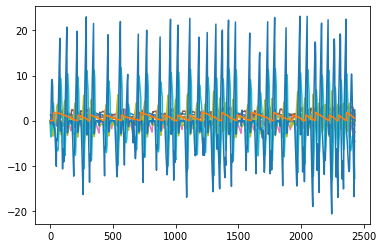

In [100]:
env_name = "hurdle_hopper-v0"
# seed = 4
# env = gym.make(env_name,slope_set=[0], random=True)
#env = gym.make("Hopper-v2")

env = gym.make(env_name,gap_set=[30, 45])

agent.step_schedule = [.05, .01]
agent.exp_schedule  = [.05, .01]

#agent = meta_agent.agents[seed]
#env.unwrapped.gap_set = [20,30]

obs, act, rew, _ = do_rollout(env.unwrapped, agent45.model, render=True , ep_length=10000, return_on_done=True)
print(sum(rew))

plt.plot(obs);

In [23]:
import xarray as xr
n_runs = 15
gap_lengths = [30,40,45]

data = xr.DataArray(np.zeros((len(gap_lengths), len(agent_list), n_runs)), dims=("gap", "agent", "run"))

for i, gap_length in enumerate(gap_lengths):
    env.unwrapped.gap_length = gap_length 
    env.unwrapped.gap_set = None

    for j, agent in enumerate(agent_list):
        for run in range(n_runs):
            obs,act,rew,_ = do_rollout(env, agent.model, render=False, ep_length=10000, return_on_done=True)
            data.loc[i, j, run] = sum(rew).item()

In [24]:
data.mean(dim='run')

<xarray.DataArray (gap: 3, agent: 2)>
array([[4381.7741896 ,  305.0130194 ],
       [ 469.39935413,  865.18598742],
       [ 430.62131162, 5101.92424278]])
Dimensions without coordinates: gap, agent

In [113]:
data.std(dim='run')

<xarray.DataArray (gap: 3, agent: 3)>
array([[ 682.32287842,  611.58030273,  873.7649822 ],
       [ 742.21691285,  667.42067233, 1048.93908105],
       [ 506.42586059,  300.85690053,  279.39337221]])
Dimensions without coordinates: gap, agent

In [26]:
import xarray as xr
n_runs = 15
gap_sets = ([30, 40], [30,45])
#agent_list = [agent30, agent40, agent45]

data = xr.DataArray(np.zeros((len(gap_sets), len(agent_list), n_runs)), dims=("gap", "agent", "run"))

for i, gap_set in enumerate(gap_sets):
    env.unwrapped.gap_length = None
    env.unwrapped.gap_set = gap_set

    for j, agent in enumerate(agent_list):
        for run in range(n_runs):
            obs,act,rew,_ = do_rollout(env, agent.model, render=False, ep_length=2000, return_on_done=True)
            data.loc[i, j, run] = sum(rew).item()

In [27]:
print(data.mean(dim='run'))
print(data.std(dim='run'))

<xarray.DataArray (gap: 2, agent: 2)>
array([[620.06712165, 500.48114173],
       [486.10074842, 545.21726318]])
Dimensions without coordinates: gap, agent
<xarray.DataArray (gap: 2, agent: 2)>
array([[216.90803718, 178.59966311],
       [204.57497615, 248.41003704]])
Dimensions without coordinates: gap, agent


In [127]:
data[1,0,:]

<xarray.DataArray (run: 15)>
array([2576.57107962,  937.15053321, 1784.49094187, 2672.23886295,
        677.08758804, 2827.22228065,  787.95771876,  689.490271  ,
       1528.46108796, 1029.92223713,  940.16335157, 2646.70696225,
       1184.85315353, 1229.51587489, 1572.310487  ])
Dimensions without coordinates: run

In [174]:
class MeshBox:
    def __init__(self, state, iden, freq, npols):
        self.state = state
        self.id = iden
        self.freq = freq
        
        self.succ_list = [[] for _ in range(npols)]
        self.pred_list = []
        self.succ_rew_list =  [[] for _ in range(npols)]
            
        self.ttl = 0
        self.opt_controller = None
        
        
def do_push_rollout_from_state(env, policy, init_state, force=None, num_steps=200, force_steps = 0, render=False):
    act_list = []
    obs_list = []
    rew_list = []
    x_list = []
    obs = my_reset(env, init_state)

    done = False
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.shape[0]

    for cur_step in range(num_steps):
        if render:
            env.render()
            time.sleep(.01)
        
        obs_list.append(np.copy(obs))

        x_list.append(env.unwrapped.sim.data.qpos[0])
        
        if force is not None:
            if cur_step < force_steps:
                env.unwrapped.sim.data.xfrc_applied[1,:] = np.array([force[0],0,force[1],0,0,0])
            else:
                env.unwrapped.sim.data.xfrc_applied[1,:] = np.zeros(6)

        act,_,_,_ = policy.step(obs)
        #act += torch.randn(act_size)*act_std
        obs, rew, done, _ = env.step(act)
        
        act_list.append(np.copy(act))
        rew_list.append(rew)
        
        if done:
            break
        
    ep_obs = np.stack(obs_list)
    ep_act = np.stack(act_list)
    ep_rew = np.array(rew_list)
    ep_rew = ep_rew.reshape(-1, 1)

    return ep_obs, ep_act, ep_rew, None 


def my_reset(env, point):
    env.reset()
    reset_state = np.copy(point)
    reset_state[0] += (env.get_height(0) - env.model.hfield_size[0,2]/2)
    
    pos = env.sim.data.qpos[0] 
    max_pos = env.model.hfield_size[0,0]*2
    index_from = (env.hopper_start_x + pos)/max_pos * env.ncol
    index_to = int(index_from + env.h_length)
    
    env.model.hfield_data[0:index_to] = env.neutral_hfield_val
    env.model.hfield_data[env.ncol:env.ncol + index_to] = env.neutral_hfield_val
    
    qpos = np.concatenate((np.array([0.0]), reset_state[:5]))
    qvel = reset_state[5:-1]
    env.unwrapped.set_state(qpos, qvel)
    return env.unwrapped._get_obs()


def fail_cond(env):
    s = env.unwrapped.state_vector()
    posafter, height, ang = env.unwrapped.sim.data.qpos[0:3]
    done = not (np.isfinite(s).all() and (np.abs(s[2:]) < 100).all() and
                    (height > .7) and (abs(ang) < .4))
    
    # set done = true if anything but the foot and ground are in contact.
    done = False
    ncon = env.unwrapped.sim.data.ncon
    if ncon:
        done = True
        
    if done:
        print((np.isfinite(s).all() , (np.abs(s[2:]) < 100).all() , (height > .7) , (abs(ang) < .4)))
        
    return done


#     for i in range(ncon):
#         geom1 = env.unwrapped.sim.data.contact[i].geom1
#         geom2 = env.unwrapped.sim.data.contact[i].geom2
#         if not (geom1 == 4 or geom1 == 0):
#             done = True
#         if not (geom2 == 4 or geom2 == 0):
#             done = True
            
#     return done

#     #tilted = np.abs(ob[:,1]) > .2 
#     short = ob[:,0] < .7
#     #return np.logical_or(tilted, short)
#     return short



def do_explore_rollout(args):
    policy, init_state, trial_num = args
    gap = math.floor(init_state[-1]*10000/400)
    if not (gap == 30 or gap == 45):
        print(gap)
    #gap = gap_mesh[[gap]]

    force = np.zeros(2)
    env.seed(trial_num)
    env.unwrapped.gap_set = [gap]
    np.random.seed(trial_num)
    env.seed(trial_num)
    obs, acts, rews, x = do_push_rollout_from_state(env, policy, init_state, force, render=False)    
    
    return np.asarray(obs), np.asarray(rews)

<seagul.rl.ars.ars_np_queue.ARSModel object at 0x7f5c0a313f28> 30
False
1 poincare snapshots, 26 states in mesh
<seagul.rl.ars.ars_np_queue.ARSModel object at 0x7f5c0a18d6a0> 45
False
1 poincare snapshots, 36 states in mesh


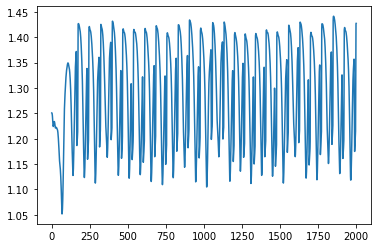

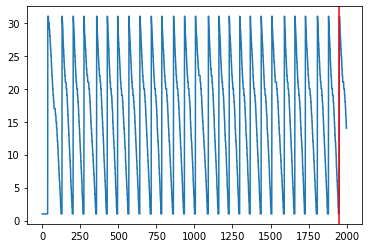

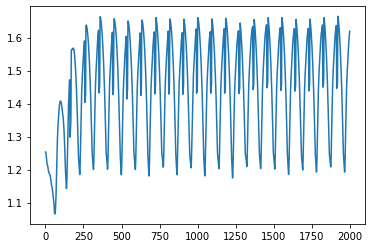

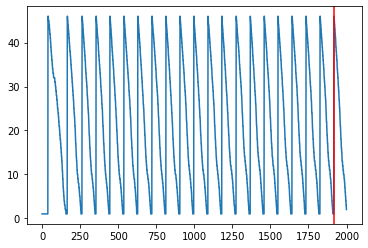

<Figure size 432x288 with 0 Axes>

In [169]:
delta =  .5;
#pols = #policy_dict[post_names[1]][0:3]
pols = [agent.model for agent in agent_list]
npol = copy.deepcopy(pols[1])
#npol.state_std[-1] = .01

mesh = BoxMesh(delta); mdim_l = []

fail_state = np.ones_like(env.reset())*100
fail_id = 0
mesh[fail_state] = MeshBox(fail_state, iden = 0, freq = 1, npols=len(pols))

for policy, gap in zip(pols, [30, 45]):
    print(policy,gap)
    #env = gym.make(env_name, gap_length=gap)
    env.unwrapped.gap_length = gap
    env.unwrapped.gap_set = None
    #env.reset()
    obs, acts, rews, uc_obs = do_push_rollout_from_state(env, policy, env.reset(), render=False, num_steps=20000)
    peak_idx,_ = find_peaks(obs[:,-1], distance=50)

    
    si = -1
    for o in obs[peak_idx[:si]]:
        key = (o - npol.state_mean)/npol.state_std

        if key in mesh:
            mesh[key].freq +=1
        else:
            mesh[key] =  MeshBox(o, iden = len(mesh), freq = 1, npols=len(pols))

    plt.plot(obs[:,0]);
    plt.figure()
    plt.plot(obs[:,-1]*10000/400)
    peak_idx,_ = find_peaks(obs[:,-1], distance=20)

    for i in peak_idx[si:]:
        plt.axvline(x=i, color='r')

    print(fail_cond(env))

    print(f"{len(peak_idx[si:])} poincare snapshots, {len(mesh)} states in mesh")
    plt.figure();

In [115]:
gap_mesh = BoxMesh(5)
gap_mesh[[30]] = 1
gap_mesh[[45]] = 1

In [170]:
start = time.time()
keys = list(mesh.keys())[1:]
i = 0 
slope_set = [-.01, 0, .01]
with Pool(12, maxtasksperchild=1000) as pool:
    for init_key in keys:    
        i+=1 
        
        init_state = mesh[init_key].state
        init_id = mesh[init_key].id
        
        state_iter = repeat(init_state, len(pols))
        rollout_seed_iter = range(i*len(pols), i*len(pols)+len(pols))

        for j, res in enumerate(pool.imap(do_explore_rollout, zip(pols, state_iter, rollout_seed_iter))):
            obs, rews = res
    
            peak_idx,_ = find_peaks(obs[:,-1], distance=20)

            if fail_cond(env) or not peak_idx.any():
                new_id = fail_id
                new_key = fail_state
                mesh[init_key].succ_list[j].append(new_id)
                mesh[init_key].succ_rew_list[j].append(0)
                mesh[new_key].pred_list.append(init_id)
                        
            elif(peak_idx.any()):
                peak_obs = obs[peak_idx[0],:]
                for gap in gap_set: 
                    peak_obs[-1] = gap*400/10000
                    new_key = ((peak_obs - np.array(npol.state_mean))/np.array(npol.state_std)).squeeze()
                    if new_key in mesh:
                        new_id = mesh[new_key].id
                        mesh[new_key].freq += 1
                    else:
                        mesh[new_key] = MeshBox(np.copy(peak_obs), len(mesh), 1, npols=len(pols))
                        new_id = len(mesh)-1
                        keys.append(mesh.__keytransform__(new_key))
                        
                    mesh[init_key].succ_list[j].append(new_id)
                    mesh[init_key].succ_rew_list[j].append(sum(rews))
                    mesh[new_key].pred_list.append(init_id)
            else:
                print("how???")
           
        if i % 1000 == 0:
            print(f"i; {i}, mdim: {len(keys)}, ratio: {i/len(keys)}")
            #print(f"i; {i}, iden: {len(iden_mesh)}, mdim: {len(mdim_mesh)}, ratio: {len(mdim_mesh)/len(iden_mesh)}")
        
print(time.time() - start)

31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
i; 1000, mdim: 1918, ratio: 0.5213764337851929
i; 2000, mdim: 3332, ratio: 0.6002400960384153
i; 3000, mdim: 4645, ratio: 0.6458557588805167
i; 4000, mdim: 5861, ratio: 0.682477392936359
i; 5000, mdim: 6991, ratio: 0.7152052639107424
i; 6000, mdim: 8123, ratio: 0.7386433583651361
i; 7000, mdim: 9149, ratio: 0.7651109410864575
i; 8000, mdim: 10452, ratio: 0.7654037504783774
i; 9000, mdim: 11912, ratio: 0.7555406312961719
i; 10000, mdim: 13384, ratio: 0.7471607890017932
i; 11000, mdim: 15046, ratio: 0.7310913199521467
i; 12000, mdim: 16658, ratio: 0.7203745947892904
i; 13000, mdim: 18116, ratio: 0.7175977036873482
i; 14000, mdim: 19534, ratio: 0.7166990887683015
i; 15000, mdim: 21078, ratio: 0.7116424708226587
i; 16000, mdim: 22750, ratio: 0.7032967032967034
i; 17000, mdim: 24222, 

Process ForkPoolWorker-632:
Process ForkPoolWorker-636:
Process ForkPoolWorker-626:
Process ForkPoolWorker-630:
Process ForkPoolWorker-634:
Process ForkPoolWorker-635:
Process ForkPoolWorker-633:
Process ForkPoolWorker-629:
Process ForkPoolWorker-631:
Process ForkPoolWorker-628:
Process ForkPoolWorker-625:
Process ForkPoolWorker-627:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/sgillen/miniconda3/envs/baselines/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/sgillen/miniconda3/envs/baselines/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/sgillen/miniconda3/envs/baselines/lib/py

KeyboardInterrupt: 

In [452]:
n_trials = 1000
import random
X_list = []
Y_list = []

Xr_list = []
R_list = []

gap_lengths=[30,45]
for mp in mesh.values():
    obs_list = []; rew_list = []
    #init_obs = env.reset()
    init_obs = mp.state
    force = np.zeros(2)
    #gap = random.choice(gap_lengths)
    env.unwrapped.gap_length = int(init_obs[-1].item())
    env.unwrapped.gap_set = None

    for agent in agent_list:
        obs, acts, rews, x = do_push_rollout_from_state(env, agent.model, init_obs, force, render=False, num_steps=200)
        obs_list.append(obs)
        rew_list.append(sum(rews))
        
    winner = np.argmax(rew_list)
    [X_list.append(o) for o in obs_list[winner]]
    y = random.choice([0,1])
    #[Y_list.append(y) for w in obs_list[winner]]
    [Y_list.append(winner) for w in obs_list[winner]]
    
    [Xr_list.append(init_obs)]
    [R_list.append(sum(rews))]

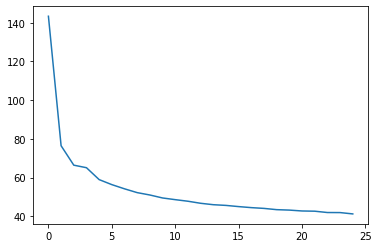

In [453]:
X = np.array(X_list, dtype=np.float32)
Y = np.array(Y_list, dtype=np.long)

from seagul.nn import fit_model, MLP
net = MLP(12, 2, 2, 64, input_bias=None)

loss_hist = fit_model(net, X, Y, 25, batch_size=2048, loss_fn=torch.nn.CrossEntropyLoss(),use_tqdm=False)

plt.plot(loss_hist)

/home/sgillen/miniconda3/envs/baselines/lib/python3.6/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([2048, 1])) that is different to the input size (torch.Size([2048, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/sgillen/miniconda3/envs/baselines/lib/python3.6/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1841, 1])) that is different to the input size (torch.Size([1841, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


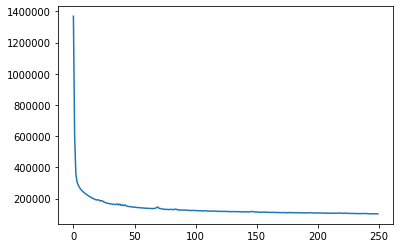

In [437]:
Xr = np.array(Xr_list, dtype=np.float32)
Yr = np.array(R_list, dtype=np.float32)

from seagul.nn import fit_model, MLP
net2 = MLP(12, 1, 2, 64, input_bias=None)

loss_hist = fit_model(net, Xr, Yr, 250, batch_size=2048, loss_fn=torch.nn.MSELoss(),use_tqdm=False)

plt.plot(loss_hist)

In [458]:
#pols = [agent.model for agent in agent_list]
pols = [agent.model for agent in agent_list]
#npol.state_std[-1] = 1
npol = copy.deepcopy(pols[1])
def do_nn_rollout_from_state(env, pols, init_state, obs_std=0, act_std=0, num_steps=1000, render=True):
    torch.autograd.set_grad_enabled(False)

    act_list = []
    obs_list = []
    rew_list = []
    val_list = []

    obs = my_reset(env, init_state)
    done = False
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.shape[0]
    pi = 0; old_pi = pi
    policy = pols[pi]

    while not done:
        if render:
            env.render()
            time.sleep(.01)
            
        n_obs = (obs - npol.state_mean)/npol.state_std
    
        preds = net(torch.tensor(obs,dtype=torch.float32))
        #print(preds)
        pi = torch.argmax(preds)
 
#         if pi != old_pi:
#            print(f"went from {old_pi} to {pi}")

        #print(env.get_height(0), env.get_height(1), env.get_height(2), obs[-1])
        old_pi = pi
        #policy = pols[pi]

        policy = pols[pi]

        obs += np.random.randn(obs_size)*obs_std
        obs_list.append(np.copy(obs))
        
        
        act,_,_,_ = policy.step(obs)
        act += np.random.randn(act_size)*act_std
        obs, rew, done, _ = env.step(act)
                
        act_list.append(np.copy(act))
        rew_list.append(rew)
        
    ep_obs = np.stack(obs_list)
    ep_act = np.stack(act_list)
    ep_rew = np.array(rew_list).reshape(-1,1)
    ep_vals = np.array(val_list).reshape(-1,1)

    
    torch.autograd.set_grad_enabled(True)
    return ep_obs, ep_act, ep_rew, ep_vals

#mesh_map = {state.id:state for state in mesh.values()}
#env.unwrapped.slope_set = [0.0]

env.unwrapped.gap_set = [30, 45]
init_obs = env.reset()
print(net2(np.array(init_obs,dtype=np.float32)))
obs,act,rews,vals = do_nn_rollout_from_state(env, pols, init_obs, render=False)
print(sum(rews))

tensor([-0.0554], grad_fn=<AddBackward0>)
[319.22822512]


array([319.22822512])

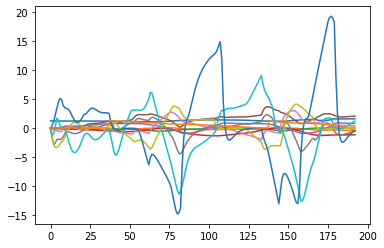

In [459]:
plt.plot(obs);
sum(rews)

In [460]:
import xarray as xr
n_runs = 15
gap_lengths = [30,40,45]

data = xr.DataArray(np.zeros((len(gap_lengths), 1, n_runs)), dims=("gap", "agent", "run"))

for i, gap_length in enumerate(gap_lengths):
    env.unwrapped.gap_length = gap_length 
    env.unwrapped.gap_set = None

    for run in range(n_runs):
        obs,act,rews,vals = do_nn_rollout_from_state(env, pols, env.reset(), render=False)
        data.loc[i, 0, run] = sum(rews).item()
            

In [461]:
data.mean(dim='run')

<xarray.DataArray (gap: 3, agent: 1)>
array([[ 410.00213523],
       [1025.92484029],
       [5325.62240522]])
Dimensions without coordinates: gap, agent

In [447]:
data.std(dim='run')

<xarray.DataArray (gap: 3, agent: 1)>
array([[159.63129855],
       [ 62.92267112],
       [134.27296546]])
Dimensions without coordinates: gap, agent

In [462]:
n_runs = 15
gap_sets = ([30, 40], [30, 45])
#agent_list = [agent30, agent40, agent45]

data = xr.DataArray(np.zeros((len(gap_sets), 1, n_runs)), dims=("gap", "agent", "run"))

for i, gap_set in enumerate(gap_sets):
    env.unwrapped.gap_length = None
    env.unwrapped.gap_set = gap_set

    for run in range(n_runs):
        obs,act,rews,vals = do_nn_rollout_from_state(env, pols, env.reset(), render=False)
        data.loc[i, 0, run] = sum(rews).item()

In [464]:
data.mean(dim='run')

<xarray.DataArray (gap: 2, agent: 1)>
array([[526.74288147],
       [448.81234639]])
Dimensions without coordinates: gap, agent

In [377]:
data.std(dim='run')

<xarray.DataArray (gap: 2, agent: 1)>
array([[214.02875045],
       [243.26438584]])
Dimensions without coordinates: gap, agent

In [66]:
from multiprocessing import Pool
from itertools import repeat

# slope_mesh = BoxMesh(.01)
# slope_mesh[[.01]] = 1
# slope_mesh[[0]] = 1
# slope_mesh[[-.01]] = 1

(array([18333.,     0., 18323.]),
 array([1.2       , 1.41333333, 1.62666667, 1.84      ]),
 <a list of 3 Patch objects>)

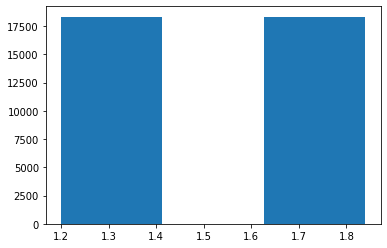

In [347]:
print(mesh)

key = list(mesh.keys())[1]

mesh_map = {state.id:state for state in mesh.values()}
npols=3
heights = np.array([m.state[-1] for m in mesh_map.values()])
plt.hist(heights[1:],bins=3)

In [121]:
# Recursive TTL

def V(mesh_id):
    mesh_state = mesh_map[mesh_id]
    
    if mesh_state.visited:
        #print(f"{mesh_id} limit cycle detected")
        mesh_state.ttl = float('inf')
        return float('inf')
        
    if (np.asarray(mesh_state.state) == fail_state).all():
        #print(f"{mesh_id} returning 0")
        return 0
    
    elif mesh_state.ttl == 0:
        #print(f"{mesh_id} descending into {mesh_state.succ_list}")
        mesh_state.visited = True
        succ_V_list = [[] for _ in range(npols)]
        inf_list = []
        
        for next_controller_id, controller_succ_list in enumerate(mesh_state.succ_list):
            for next_state_id in controller_succ_list:
                succ_V_list[next_controller_id].append(V(next_state_id))
                
#         for controller_id, rew_list in next_list:
#             limit_idx = [i for i,ttl in enumerate(rew_list) if ttl == float('inf')]
#             if len(limit_idx):
#                 mesh_state.ttl = float('inf')
#                 limit_rewards = [mesh_state.succ_rew_list[i] for i in limit_idx]
#                 mesh_state.opt_controller = mesh_state.succ_rew_list.index(max(limit_rewards))

        else:
            min_slope_V = [min(thing) for thing in succ_V_list]
            max_controller_V = max(min_slope_V)
            curr_r  = max(max(mesh_state.succ_rew_list))
            
            mesh_state.ttl =  curr_r + max_controller_V
            mesh_state.opt_controller = min_slope_V.index(max_controller_V)

        #print(f"{mesh_id} resulting list was {next_list} , new ttl is {mesh_state.ttl}")
        return mesh_state.ttl
        
    else:
        #print(f"{mesh_id} returning ttl of {mesh_state.ttl}")
        return mesh_state.ttl
    
    
# Iterative TTL   
        
for state in mesh.values():
    state.ttl = 0
    state.visited = False
    
    
V(10)

ValueError: min() arg is an empty sequence

In [ ]:
def do_opt_rollout_from_state(env, pols, init_state, obs_std=0, act_std=0, num_steps=1000, render=True):
    act_list = []
    obs_list = []
    rew_list = []
    val_list = []

    obs = my_reset(env, init_state)
    uc_obs = np.concatenate([env.sim.data.qpos.flat[1:], env.sim.data.qvel.flat])
    done = False
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.shape[0]
    pi = 1
    policy = pols[pi]


    
    out = 0
    inm = 0
    while not done:
        if render:
            env.render()
            time.sleep(.01)
            
        obs_key = (obs - npol.state_mean)/npol.state_std
        if not obs_key in mesh:
            out+=1
        else:
            if mesh[obs_key].opt_controller is None:
                V(mesh[obs_key].id)
            
            inm +=1
            print(mesh[obs_key].opt_controller)
            policy = pols[mesh[obs_key].opt_controller] 
            print(f"going from pol {pi} to {mesh[obs_key].opt_controller}" )
            pi = mesh[obs_key].opt_controller
            

        #policy = pols[0]

        obs += np.random.randn(obs_size)*obs_std
        obs_list.append(np.copy(obs))
        
       
        try:
            val_list.append(V(mesh[obs_key].id))
        except:
            pass
        
        act,_,_,_ = policy.step(obs)
        act += np.random.randn(act_size)*act_std
        obs, rew, done, _ = env.step(act)
        
        act_list.append(np.copy(act))
        rew_list.append(rew)
        
    ep_obs = np.stack(obs_list)
    ep_act = np.stack(act_list)
    ep_rew = np.array(rew_list).reshape(-1,1)
    ep_vals = np.array(val_list).reshape(-1,1)

    
    print(out, inm)
    torch.autograd.set_grad_enabled(True)
    return ep_obs, ep_act, ep_rew, ep_vals

#mesh_map = {state.id:state for state in mesh.values()}

env.unwrapped.slope_set = [0.0]#[0.00, 0.01, -0.01]
env.unwrapped.random=True
obs,act,rews,vals = do_opt_rollout_from_state(env, pols, mesh_map[10].state, render=True)

In [ ]:
num_trials = 250000
X = [(point.state - npol.state_mean)/npol.state_std for point in mesh_map.values()]
X = np.array(X, dtype=np.float32)

Yl = []
for x in X:
    if x[-1] < 0:
        Yl.append(0)
    elif x[-1] == 0:
        Yl.append(1)
    elif  x[-1] >  0:
        Yl.append(2)
    else:
        panic
        
    

Y = np.stack(Yl)
Y = np.array(Y,dtype=np.long)

In [ ]:
from seagul.nn import fit_model
net = MLP(12, 3, 2, 32)
loss_hist = fit_model(net, X, Y, 100, batch_size=2048, loss_fn=torch.nn.CrossEntropyLoss())

plt.plot(loss_hist)

In [ ]:
print(mesh_map[5].state)
net(np.array((mesh_map[1].state - npol.state_mean)/npol.state_std, dtype=np.float32))

In [ ]:
mesh_map[1].state

In [ ]:
def do_nn_rollout_from_state(env, pols, init_state, obs_std=0, act_std=0, num_steps=1000, render=True):
    act_list = []
    obs_list = []
    rew_list = []
    val_list = []

    obs = my_reset(env, init_state)
    uc_obs = np.concatenate([env.sim.data.qpos.flat[1:], env.sim.data.qvel.flat])
    done = False
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.shape[0]
    pi = 1; old_pi = pi
    policy = pols[pi]

    while not done:
        if render:
            env.render()
            time.sleep(.01)
    
        preds = net(np.array(obs,dtype=np.float32))
        pi = torch.argmax(preds)
        
#         if pi != old_pi:
#             print(f"went from {old_pi} to {pi}")

        #print(env.get_height(0), env.get_height(1), env.get_height(2), obs[-1])
        old_pi = pi
        policy = pols[pi]

        #policy = pols[0]

        obs += np.random.randn(obs_size)*obs_std
        obs_list.append(np.copy(obs))
        
        try:
            val_list.append(V(mesh[obs_key].id))
        except:
            pass
        
        act,_,_,_ = policy.step(obs)
        act += np.random.randn(act_size)*act_std
        obs, rew, done, _ = env.step(act)
        
        act_list.append(np.copy(act))
        rew_list.append(rew)
        
    ep_obs = np.stack(obs_list)
    ep_act = np.stack(act_list)
    ep_rew = np.array(rew_list).reshape(-1,1)
    ep_vals = np.array(val_list).reshape(-1,1)

    
    torch.autograd.set_grad_enabled(True)
    return ep_obs, ep_act, ep_rew, ep_vals

#mesh_map = {state.id:state for state in mesh.values()}

env.unwrapped.slope_set = [0.01]
env.unwrapped.random=False
obs,act,rews,vals = do_nn_rollout_from_state(env, pols, mesh_map[10].state, render=True)

In [ ]:
plt.plot(obs[:,-1])

In [ ]:
torch.argmax??

In [ ]:
t = pickle.load(open("./agents/hurdle_100120_2", 'rb'))
t[0]

Creating window glfw
[581.82631353]


Text(0.5, 1.0, 'With reward postprocessing')

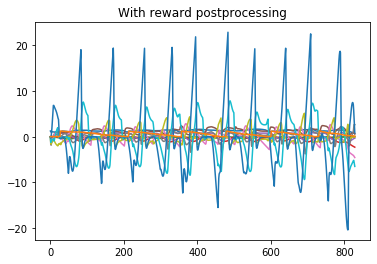

In [32]:
env_name = "hurdle_hopper-v0"
env = gym.make(env_name,gap_set=[30])

obs, act, rew, _ = do_rollout(env.unwrapped, agent_list[1].model, render=True, ep_length=2000, return_on_done=True)
print(sum(rew))
plt.plot(obs);
plt.title("With reward postprocessing")

In [ ]:
env_name = "hurdle_hopper-v0"
env = gym.make(env_name,gap_set=[15])

obs, act, rew, _ = do_rollout(env.unwrapped, iden_agent.model, render=False, ep_length=2000, return_on_done=True)
print(sum(rew))
plt.plot(obs);
plt.title("Without reward postprocessing")

In [108]:
with open("./agents/mdim_304045_gap_back", "wb") as f:
    pickle.dump(agent_list,f)

In [53]:
agent_list = agent_list[-2:]

In [107]:
agent_list[0].__dir__()

['env_name',
 'n_workers',
 'step_size',
 'n_delta',
 'n_top',
 'exp_noise',
 'postprocessor',
 'seed',
 'r_hist',
 'lr_hist',
 'total_epochs',
 'total_steps',
 'reward_stop',
 'model',
 'env_config',
 'W',
 'state_mean',
 'state_std',
 'step_schedule',
 'exp_schedule',
 '__module__',
 '__doc__',
 '__init__',
 'learn',
 '__dict__',
 '__weakref__',
 '__slotnames__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']